In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Data Exploration

In [2]:
# Load the dataset
df = pd.read_csv('bitcoin_2023-12-04_2024-01-03.csv')

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       30 non-null     object 
 1   End         30 non-null     object 
 2   Open        30 non-null     float64
 3   High        30 non-null     float64
 4   Low         30 non-null     float64
 5   Close       30 non-null     float64
 6   Volume      30 non-null     float64
 7   Market Cap  30 non-null     float64
dtypes: float64(6), object(2)
memory usage: 2.0+ KB
None


In [4]:
# Display summary statistics
print(df.describe())

               Open          High           Low         Close        Volume   
count     30.000000     30.000000     30.000000     30.000000  3.000000e+01  \
mean   42832.115667  43622.749333  42168.725333  42994.216667  3.642569e+10   
std     1038.979142    819.266953   1085.095863    947.657981  8.667869e+09   
min    39996.280000  42045.960000  39996.280000  41221.120000  2.095794e+10   
25%    42222.082500  43045.007500  41575.610000  42229.220000  3.021926e+10   
50%    42896.780000  43727.820000  42077.035000  43011.035000  3.562396e+10   
75%    43708.517500  44185.015000  43100.267500  43724.122500  4.167466e+10   
max    44245.110000  45846.210000  44245.110000  44957.630000  5.852853e+10   

         Market Cap  
count  3.000000e+01  
mean   8.392756e+11  
std    1.787398e+10  
min    8.103866e+11  
25%    8.280649e+11  
50%    8.383620e+11  
75%    8.541279e+11  
max    8.859783e+11  


# Data Preprocessing

In [5]:
# Convert date columns to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']])

# Display scaled data
print(pd.DataFrame(data=scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']))


        Open      High       Low     Close    Volume  Market Cap
0  -2.776105 -1.535002 -2.036303 -1.071573  1.036165   -1.640249
1  -0.981537  0.982301 -0.685026  1.171438  1.539576   -0.561599
2   1.234542  0.803530  1.204729  0.773092  2.593567    1.081109
3   0.864660  0.525391  0.789585  0.274514  0.544579    0.726506
4   0.506036  1.230620  0.901024  1.293415  0.386745    0.846839
5   1.366865  0.895858  1.369681  0.758839 -0.176550    1.249818
6   0.888811  0.509301  1.350972  0.824771 -1.283351    1.029361
7   0.942623  0.225539 -1.681138 -1.903016  0.880337   -1.078501
8  -1.564465 -1.957536 -1.376130 -1.590168  1.481757   -1.493333
9  -1.375481 -0.333272 -1.382439 -0.093747  0.186596   -1.412052
10 -0.000084 -0.329175 -0.215910  0.010683  0.762756   -0.047677
11  0.126688 -0.675433 -0.399683 -1.117058  0.197012   -0.458512
12 -0.833091 -1.148173 -0.415037 -0.804532 -0.805616   -0.663369
13 -0.537589 -1.495176 -0.815718 -1.658707 -1.411652   -1.031728
14 -1.372015 -1.126981 -1

#  Data Visualization

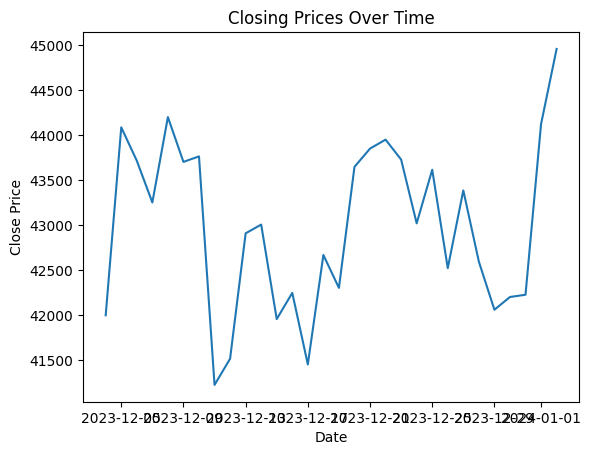

In [6]:
# Line plot of closing prices over time
plt.plot(df['Start'], df['Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


# 6 Unsupervised Learning models

C:\Users\kemst\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


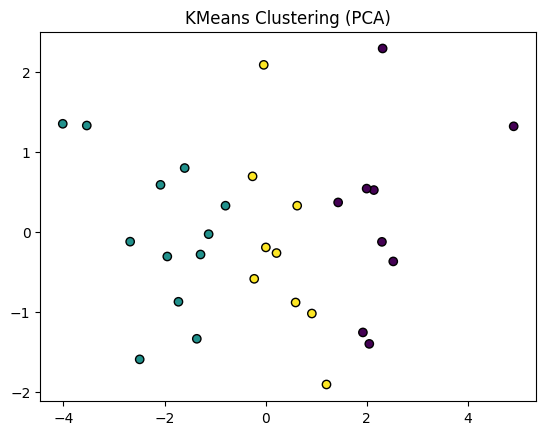

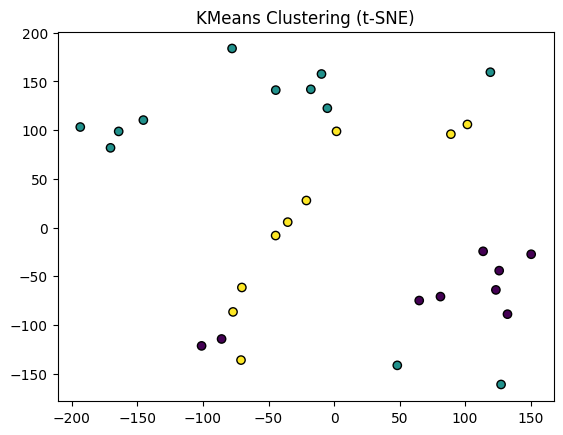

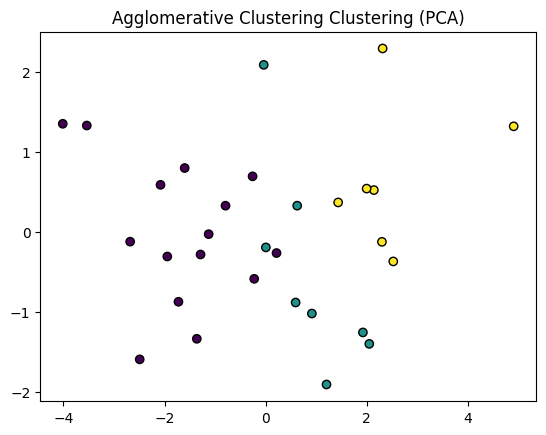

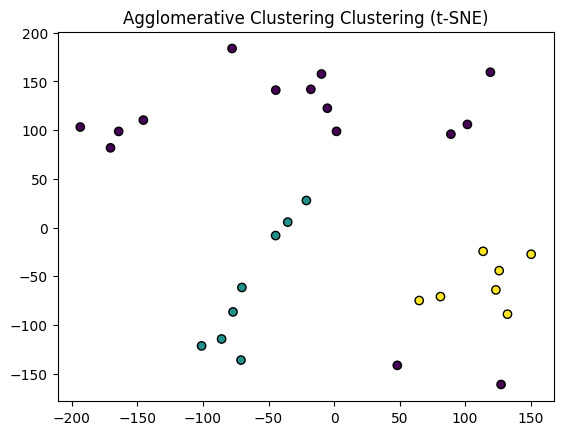

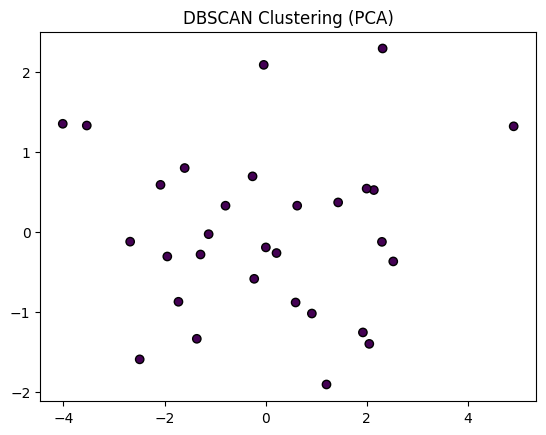

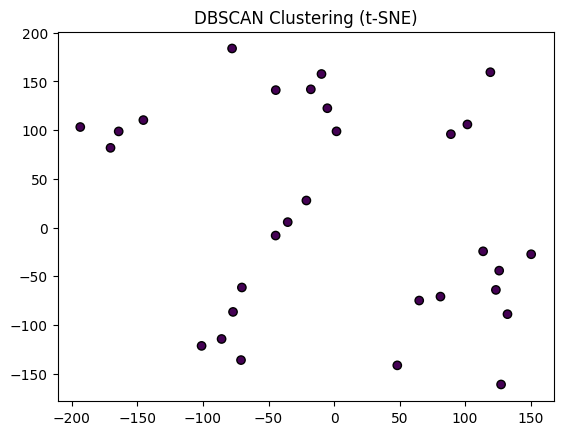

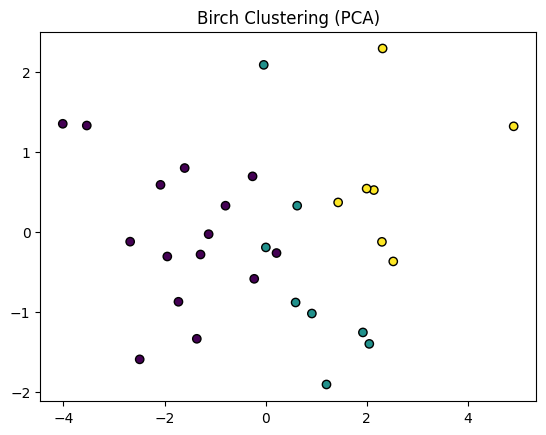

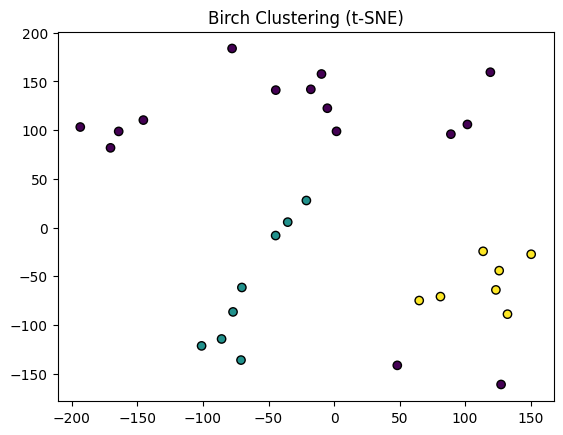

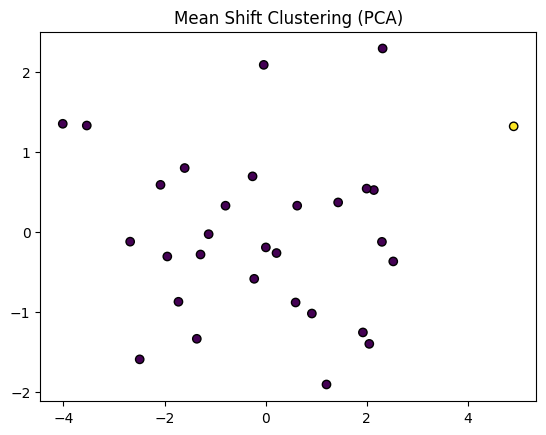

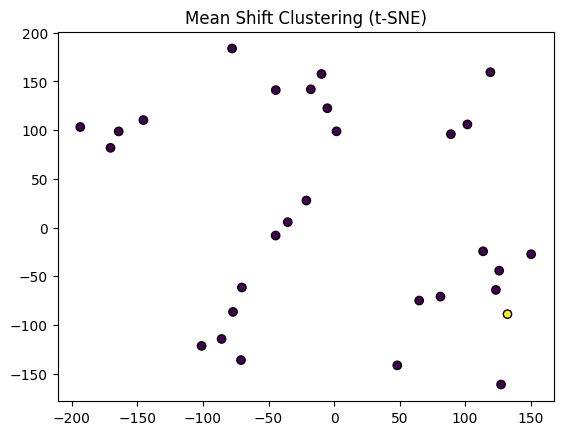

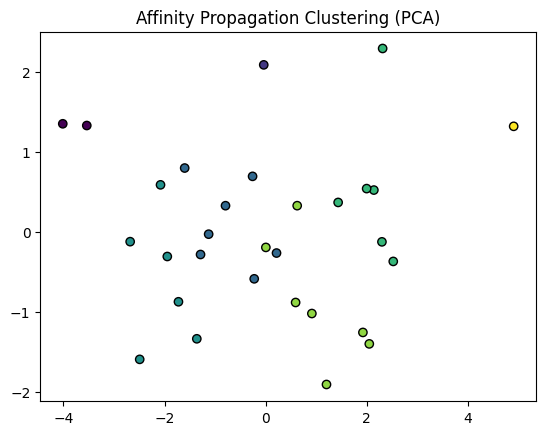

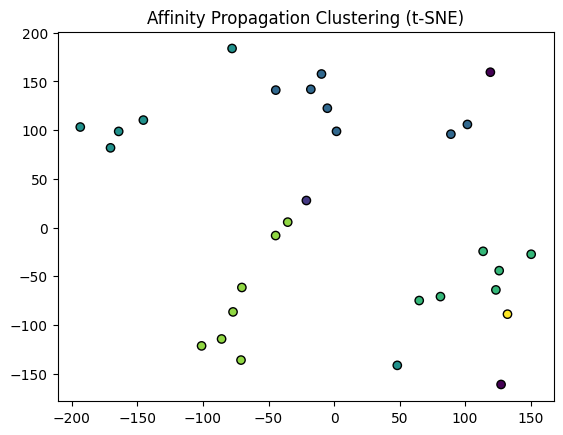

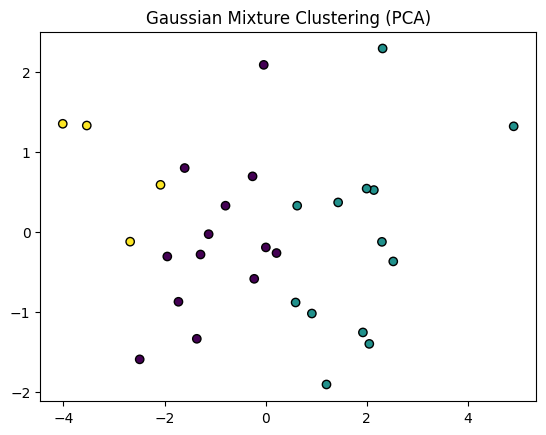

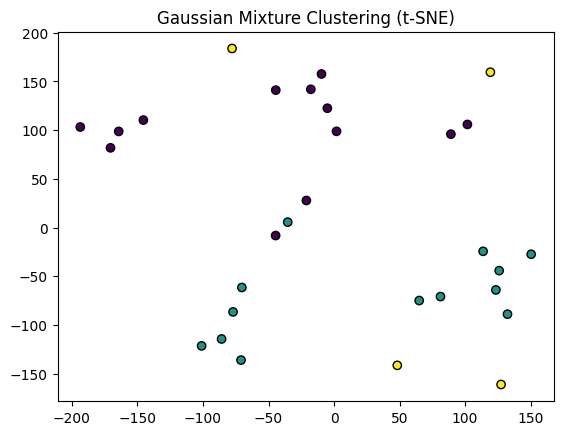

In [7]:
# Select numerical features for clustering
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Models
kmeans = KMeans(n_clusters=3, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
birch = Birch(n_clusters=3)
mean_shift = MeanShift()
affinity_propagation = AffinityPropagation()
gmm = GaussianMixture(n_components=3, random_state=42)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42, perplexity=2)  # Reduced perplexity value

# Apply dimensionality reduction
X_pca = pca.fit_transform(X_scaled)
X_tsne = tsne.fit_transform(X_scaled)

# Function to plot clusters
def plot_clusters(X_reduced, labels, title):
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', edgecolors='k')
    plt.title(title)
    plt.show()

# Fit and visualize the models
models = [kmeans, agg_clustering, dbscan, birch, mean_shift, affinity_propagation, gmm]
model_names = ['KMeans', 'Agglomerative Clustering', 'DBSCAN', 'Birch', 'Mean Shift', 'Affinity Propagation', 'Gaussian Mixture']

for model, name in zip(models, model_names):
    if model != dbscan and model != mean_shift and model != affinity_propagation:  # DBSCAN, MeanShift, and AffinityPropagation don't have predict method
        labels = model.fit_predict(X_scaled)
        plot_clusters(X_pca, labels, f'{name} Clustering (PCA)')
        plot_clusters(X_tsne, labels, f'{name} Clustering (t-SNE)')
    else:
        if model == dbscan:
            labels = model.fit_predict(X_scaled)
            plot_clusters(X_pca, labels, f'{name} Clustering (PCA)')
            plot_clusters(X_tsne, labels, f'{name} Clustering (t-SNE)')
        elif model == mean_shift:
            labels = model.fit_predict(X_scaled)
            plot_clusters(X_pca, labels, f'{name} Clustering (PCA)')
            plot_clusters(X_tsne, labels, f'{name} Clustering (t-SNE)')
        else:
            labels = model.fit(X_scaled).labels_
            plot_clusters(X_pca, labels, f'{name} Clustering (PCA)')
            plot_clusters(X_tsne, labels, f'{name} Clustering (t-SNE)')


# Hyper-parameter Tuning

In [8]:
# Feature engineering (you might need more features for a real dataset)
df['Date'] = pd.to_datetime(df['Start'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Drop unnecessary columns
df.drop(['Start', 'End', 'Date'], axis=1, inplace=True)

# Select features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Day', 'Month', 'Year']
X = df[features]
y = df['Close']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)  # Adjust the number of splits

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_search.fit(X_scaled, y)

# Display best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


# evaluate the models

Silhouette Score: 0.2091753891631227


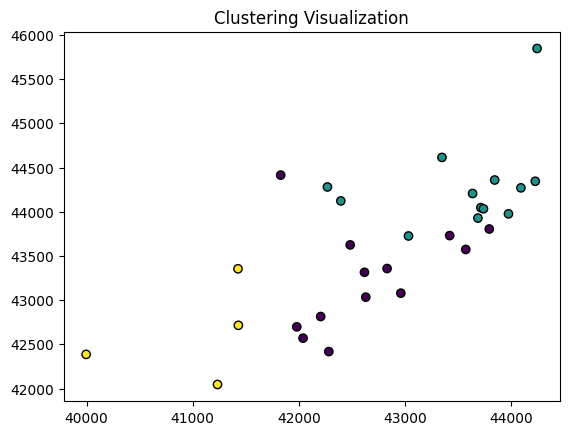

In [9]:
# Assuming labels is the cluster labels obtained from a model
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")
# Assuming 'Open' and 'High' are the features you want to visualize
plt.scatter(X['Open'], X['High'], c=labels, cmap='viridis', edgecolors='k')
plt.title('Clustering Visualization')
plt.show()

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a model (replace with the model of your choice)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 7257.727543213997
R-squared: 0.9879981644329897


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and model training steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Use a model of your choice
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 7432.445613987043
R-squared: 0.9877092396223629


# Pipeline for project

C:\Users\kemst\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


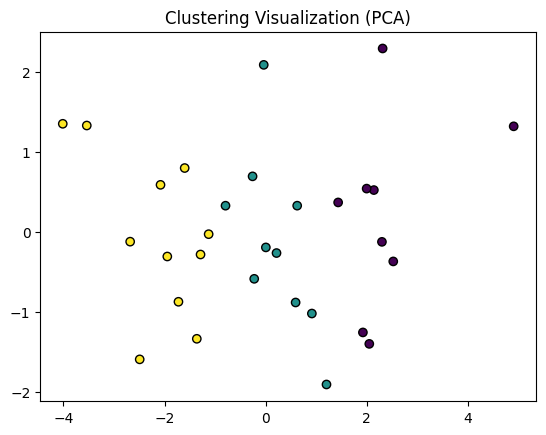

In [12]:
# Select numerical features for clustering
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42, perplexity=2)

# Clustering models
kmeans = KMeans(n_clusters=3, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
birch = Birch(n_clusters=3)
mean_shift = MeanShift()
affinity_propagation = AffinityPropagation()
gmm = GaussianMixture(n_components=3, random_state=42)

# Visualization
pca_plot = PCA(n_components=2)
tsne_plot = TSNE(n_components=2, random_state=42, perplexity=2)

# Create a pipeline
clustering_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA(n_components=2)),
    ('cluster', KMeans(n_clusters=3, random_state=42))
])

# Fit and predict with the pipeline
labels = clustering_pipeline.fit_predict(X)

# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title('Clustering Visualization (PCA)')
plt.show()
